In [2]:
import numpy as np
import pandas as pd

In [4]:
# Download  the  Adult  training  data  set:
adults = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=', ', engine='python', 
                     names=('age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                            'hours-per-week', 'native-country', 'income'))
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# How many males and females are there?
adults[adults['sex'] == 'Male'].sex.count()

21790

In [6]:
# What is the mean male age?
adults[adults['sex'] == 'Male'].groupby('sex')['age'].mean()

sex
Male    39.433547
Name: age, dtype: float64

In [7]:
# What is the proportion of the US citizens?
adults[adults['native-country'] == 'United-States'].sex.value_counts(normalize=True)

Male      0.668084
Female    0.331916
Name: sex, dtype: float64

In [8]:
# Plot the distribution of people’s education as a bar plot.
import matplotlib.pyplot as plt

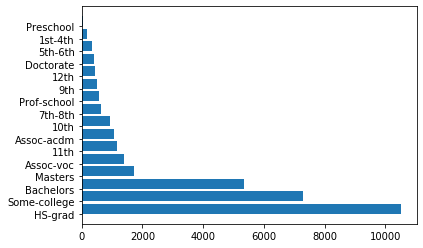

In [9]:
plt.barh(adults['education'].value_counts().index, adults['education'].value_counts().values, 
        tick_label=adults["education"].value_counts().index, align='edge'); 

In [10]:
# What is the mean and standard deviation of the ”final weight” for divorced people?
adults.groupby('marital-status')['fnlwgt'].mean()

marital-status
Divorced                 185802.790457
Married-AF-spouse        188165.565217
Married-civ-spouse       186763.172877
Married-spouse-absent    193141.760766
Never-married            195383.308996
Separated                206444.325854
Widowed                  174159.042296
Name: fnlwgt, dtype: float64

In [11]:
adults.groupby('marital-status')['fnlwgt'].std()

marital-status
Divorced                 105646.789459
Married-AF-spouse        139868.801057
Married-civ-spouse       103097.543011
Married-spouse-absent    114937.598737
Never-married            107765.354649
Separated                117601.326229
Widowed                   94005.379316
Name: fnlwgt, dtype: float64

In [12]:
#  Is it true that the people who receive over 50k are mostly highly educated?
adults[adults['income'] == '>50K']['education'].value_counts(normalize=True)

Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
Name: education, dtype: float64

In [13]:
# What is the maximum male and female age for each race?
adults.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

In [14]:
# The people from which countries work as farmers/fishers?
adults[adults['occupation'] == 'Farming-fishing'].groupby('native-country')['occupation'].count()

native-country
?                  5
Cambodia           1
Canada             2
Cuba               2
El-Salvador        2
England            1
France             1
Germany            1
Guatemala          4
Hong               1
Ireland            1
Italy              2
Japan              1
Mexico            77
Philippines        4
Poland             1
Portugal           1
Puerto-Rico        5
United-States    879
Vietnam            2
Yugoslavia         1
Name: occupation, dtype: int64

In [15]:
# Consider  the  ratio  of  the  number  of  
# 1)  male  bachelors  to  male  masters,  and  2)  femalebachelors to female masters.  
# Which one is higher?
men = adults[adults['sex'] == 'Male']
women = adults[adults['sex'] == 'Female']

In [16]:
print("male", len(men[men['education'] == 'Bachelors']) / 
      len(men[men['education'] == 'Masters']))
print("female", len(women[women['education'] == 'Bachelors']) / 
      len(women[women['education'] == 'Masters']))

male 3.14743049705139
female 3.0205223880597014


In [17]:
# What is the largest number of hours a person works a week?  
# How many people who workthis number of hours are there?  
# What is their income?
adults['hours-per-week'].max()

99

In [18]:
len(adults[adults['hours-per-week'] == 99])

85

In [19]:
adults[adults['hours-per-week'] == 99]['income'].value_counts()

<=50K    60
>50K     25
Name: income, dtype: int64